## Based on the Kaggle notebook: https://www.kaggle.com/someadityamandal/bitcoin-time-series-forecasting

## Some libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import csv


In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 4.6MB/s 


In [3]:
import matplotlib.pyplot as plt

from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Importing data

In [4]:
#data = pd.read_csv('../data_extraction/full_data_eth_20072020.csv')
data = pd.read_csv('full_data_eth_20072020.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 20, 2020",238.49,239.58,234.85,236.15,"5,600,686,192","26,411,853,756"
1,"Jul 19, 2020",235.46,239.16,233.28,238.49,"6,251,377,305","26,669,691,075"
2,"Jul 18, 2020",232.86,236.54,232.32,235.48,"5,397,402,117","26,330,601,164"
3,"Jul 17, 2020",233.69,234.42,232.11,232.77,"5,859,850,529","26,024,301,468"
4,"Jul 16, 2020",238.45,239.01,231.62,233.64,"5,832,057,567","26,118,155,895"


In [5]:
data.dtypes

Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

## Function to change object to numerical data

In [6]:
def obj_to_num(df,cols):
    def obj_to_num(row):
        row = row.replace(',','')
        return float(row)

    for col in cols: 
        df[col] = df[col].apply(obj_to_num) 
    return df

In [7]:
columns = ['Open','High','Low','Close','Volume','Market Cap']
num_data = obj_to_num(data,columns)
num_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 20, 2020",238.49,239.58,234.85,236.15,5.600686e+09,2.641185e+10
1,"Jul 19, 2020",235.46,239.16,233.28,238.49,6.251377e+09,2.666969e+10
2,"Jul 18, 2020",232.86,236.54,232.32,235.48,5.397402e+09,2.633060e+10
3,"Jul 17, 2020",233.69,234.42,232.11,232.77,5.859851e+09,2.602430e+10
4,"Jul 16, 2020",238.45,239.01,231.62,233.64,5.832058e+09,2.611816e+10


In [8]:
from datetime import datetime
num_data['Date'] = num_data['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))
num_data['Date'] = pd.to_datetime(num_data['Date'], utc=True)
num_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-07-20 00:00:00+00:00,238.49,239.58,234.85,236.15,5.600686e+09,2.641185e+10
1,2020-07-19 00:00:00+00:00,235.46,239.16,233.28,238.49,6.251377e+09,2.666969e+10
2,2020-07-18 00:00:00+00:00,232.86,236.54,232.32,235.48,5.397402e+09,2.633060e+10
3,2020-07-17 00:00:00+00:00,233.69,234.42,232.11,232.77,5.859851e+09,2.602430e+10
4,2020-07-16 00:00:00+00:00,238.45,239.01,231.62,233.64,5.832058e+09,2.611816e+10


In [9]:
num_data.dtypes

Date          datetime64[ns, UTC]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Market Cap                float64
dtype: object

## Making data plots

In [10]:
!pip install pytz

In [11]:
# create valid date range
import pytz
start = datetime(2013, 3, 5, 0, 0, 0, 0, pytz.UTC)
end = datetime(2020, 7, 20, 0, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = num_data[(num_data['Date'] >= start) & (num_data['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-08-10 00:00:00+00:00,0.713989,0.729854,0.636546,0.708448,405283.0,42818364.0
1,2015-08-17 00:00:00+00:00,1.580000,1.580000,1.190000,1.200000,1942830.0,87295367.0
2,2015-08-24 00:00:00+00:00,1.350000,1.360000,1.230000,1.230000,924920.0,89515257.0
3,2015-08-31 00:00:00+00:00,1.320000,1.400000,1.200000,1.360000,1447180.0,98963975.0
4,2015-09-07 00:00:00+00:00,1.300000,1.310000,1.240000,1.250000,489014.0,91020735.0


In [12]:
#import chart_studio.plotly as py
import plotly.graph_objects as go
import chart_studio as py

In [13]:
#user = input('type username:')
#key = input('type key:')
py.tools.set_credentials_file(username='ji_nb', api_key='eGoxXwU4vG6jV7WJVzpw')
#py.tools.set_credentials_file(username=user, api_key=key)

In [14]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['High'].astype(float),
    mode = 'lines',
    name = 'High'
)
trace4 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Low'].astype(float),
    mode = 'lines',
    name = 'Low'
)

layout = dict(
    title='Historical ETH Prices (...-2020) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1day',
                     step='day',
                     stepmode='backward'),
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1, trace2, trace3, trace4]
fig = dict(data=data.copy(), layout=layout)
py.plotly.iplot(fig, filename = "Time_Series_with_Rangeslider")

In [15]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Volume'].astype(float),
    mode = 'lines',
    name = 'ETH Price (Open)'
)

layout = dict(
    title='Historical ETH Volume (USD) (...-2020)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data.copy(), layout=layout)
py.plotly.iplot(fig, filename = "Time Series with Rangeslider")

## First time series LSTM

### Firs of all we don't have enough data so I think this LSTM model is going to be underfitted

In [22]:
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d')
data  = pd.read_csv('full_data_eth_20072020.csv', parse_dates=[0], date_parser=dateparse)
columns = ['Open','High','Low','Close','Volume','Market Cap']
num_data = obj_to_num(data,columns)
data['Date'] = data['Date'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Date', freq='H')]).first().reset_index()
data = data.set_index('Date')
data = data[['Close']]
data.dropna(subset=['Close'], inplace=True)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,Close
Date,
2015-08-07,2.770000
2015-08-08,0.753325
2015-08-09,0.701897
2015-08-10,0.708448
2015-08-11,1.070000


In [23]:
split_date = '01-Jul-2020'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [25]:
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))


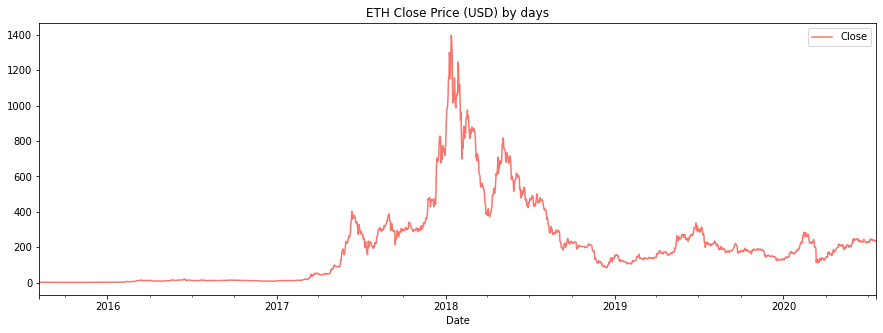

In [26]:
_ = data.plot(style='', figsize=(15,5), color="#F8766D", title='ETH Close Price (USD) by days')

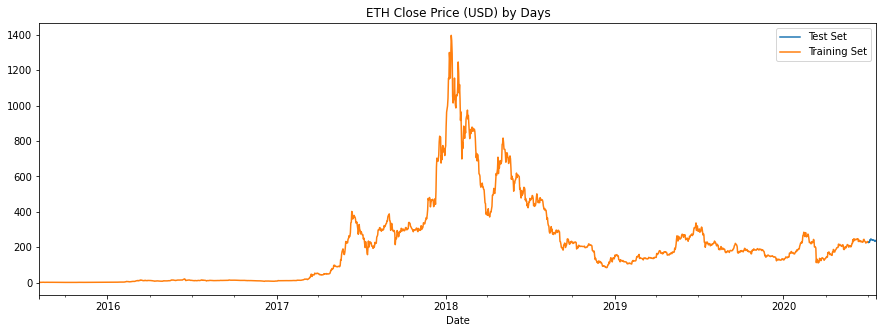

In [27]:
_ = data_test \
    .rename(columns={'Close': 'Test Set'}) \
    .join(data_train.rename(columns={'Close': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='ETH Close Price (USD) by Days', style='')

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=False)

Using TensorFlow backend.


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_ETH_price = model.predict(inputs)
predicted_ETH_price = sc.inverse_transform(predicted_ETH_price)

In [31]:
data_test['Close_prediction'] = predicted_ETH_price
data_all = pd.concat([data_test, data_train], sort=False)

In [32]:
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Close_prediction': 'lstm'})  #Rename Close_pred as lstm
final_data = final_data[['Date','Close','lstm']]
final_data.head()

,Date,Close,lstm
0,2020-07-02,229.39,213.314651
1,2020-07-03,225.39,209.543900
2,2020-07-04,229.07,213.012955
3,2020-07-05,227.66,211.683655
4,2020-07-06,241.51,224.746017


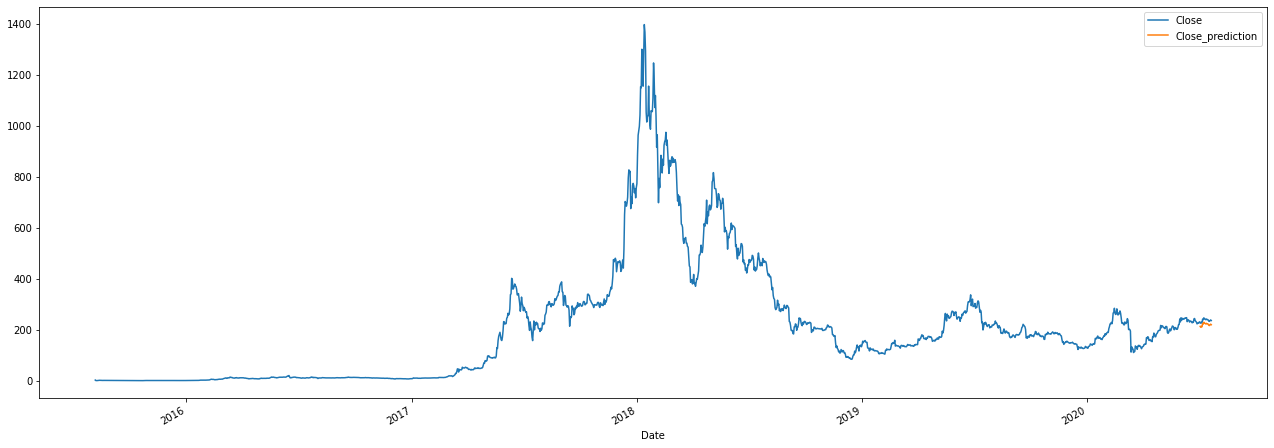

In [33]:
_ = data_all[['Close','Close_prediction']].plot(figsize=(22, 8))

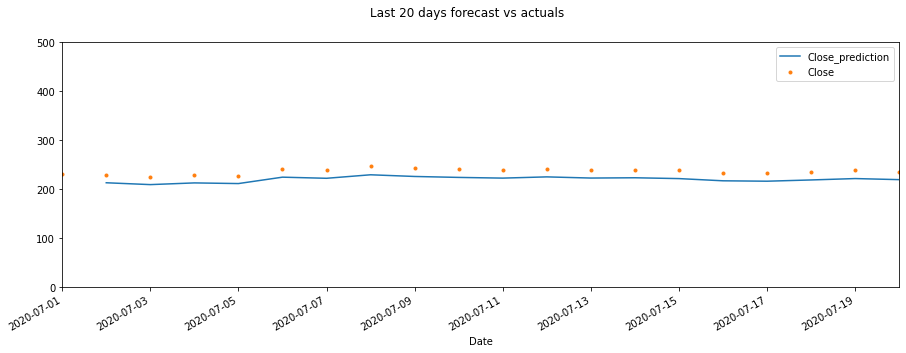

In [37]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Close_prediction','Close']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='07-01-2020', upper='07-20-2020')
ax.set_ylim(0, 500)
plot = plt.suptitle('Last 20 days forecast vs actuals')

In [38]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
mse(y_true=data_test['Close'],
                   y_pred=data_test['Close_prediction'])

272.2283249566428

In [39]:
mae(y_true=data_test['Close'],
                   y_pred=data_test['Close_prediction'])

16.496261853669814

## Time series with XGBoost

In [40]:
!pip install dateparser

     |████████████████████████████████| 368kB 8.1MB/s 


In [41]:
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
import dateparser
plt.style.use('fivethirtyeight')

In [42]:
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d')
datat  = pd.read_csv('full_data_eth_20072020.csv', parse_dates=[0], date_parser=dateparse)
datat['Date'] = datat['Date'].dt.tz_localize(None)
datat = datat.groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
datat = datat.set_index('Date')
datat = datat[['Close']]
datat.dropna(subset=['Close'], inplace=True)
datat[-5:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,Close
Date,
2020-07-16,233.64
2020-07-17,232.77
2020-07-18,235.48
2020-07-19,238.49
2020-07-20,236.15


In [43]:
columns = ['Close']
datat = obj_to_num(datat,columns)   # Function to change object to numerical data

In [44]:
datat.dtypes

Close    float64
dtype: object

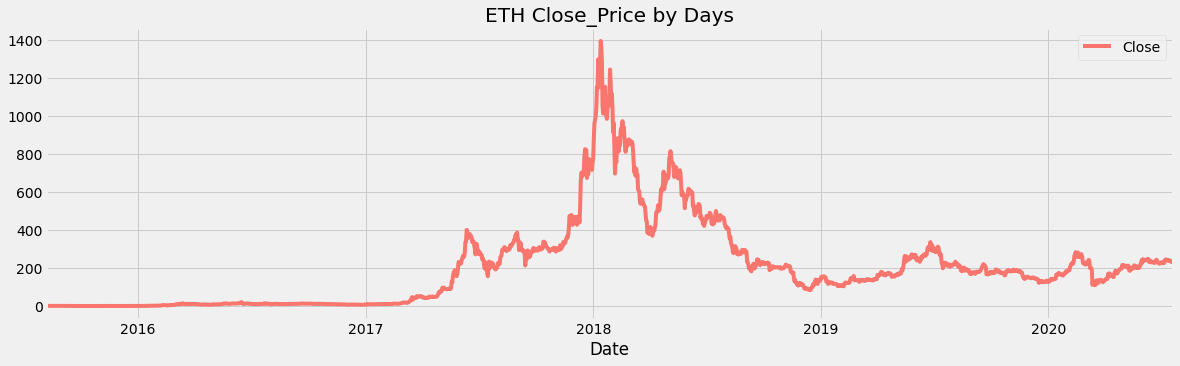

In [45]:
_ = datat.plot(style='', figsize=(18,5), color="#F8766D", title='ETH Close_Price by Days')

In [46]:
split_date = '2020-07-01'
data_train = datat.loc[datat.index <= split_date].copy()
data_test = datat.loc[datat.index > split_date].copy()

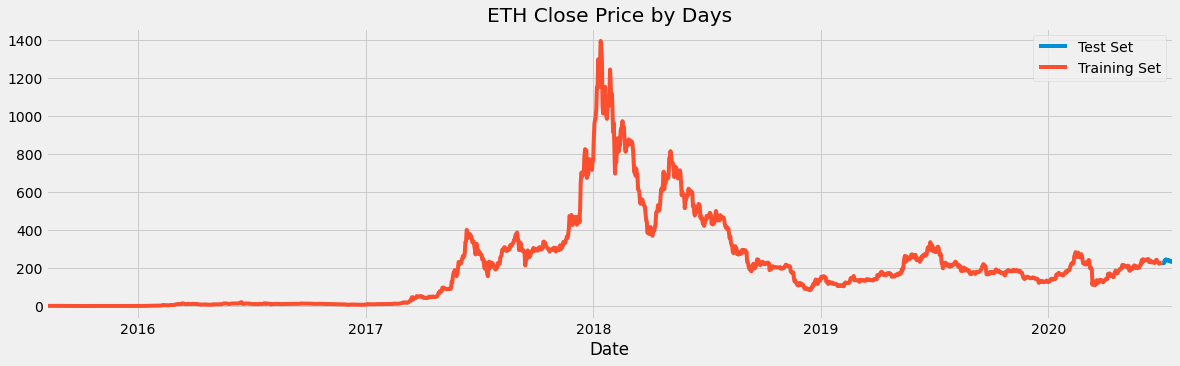

In [48]:
_ = data_test \
    .rename(columns={'Close': 'Test Set'}) \
    .join(data_train.rename(columns={'Close': 'Training Set'}), how='outer') \
    .plot(figsize=(18,5), title='ETH Close Price by Days', style='')

In [49]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [50]:
X_train, y_train = create_features(data_train, label='Close')
X_test, y_test = create_features(data_test, label='Close')

In [51]:
y_test

Date
2020-07-02    229.39
2020-07-03    225.39
2020-07-04    229.07
2020-07-05    227.66
2020-07-06    241.51
2020-07-07    239.08
2020-07-08    246.67
2020-07-09    243.02
2020-07-10    240.98
2020-07-11    239.46
2020-07-12    242.13
2020-07-13    239.60
2020-07-14    240.21
2020-07-15    238.42
2020-07-16    233.64
2020-07-17    232.77
2020-07-18    235.48
2020-07-19    238.49
2020-07-20    236.15
Name: Close, dtype: float64

In [52]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[01:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [53]:
data_test['Close_prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

In [55]:
#final_data = datat.copy()
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'Close_prediction': 'xgboost'})
final_data = final_data[['Date','Close','lstm','xgboost']]
final_data.head()

,Date,Close,lstm,xgboost
0,2020-07-02,229.39,213.314651,237.856827
1,2020-07-03,225.39,209.543900,236.794052
2,2020-07-04,229.07,213.012955,236.442245
3,2020-07-05,227.66,211.683655,233.456924
4,2020-07-06,241.51,224.746017,233.517105


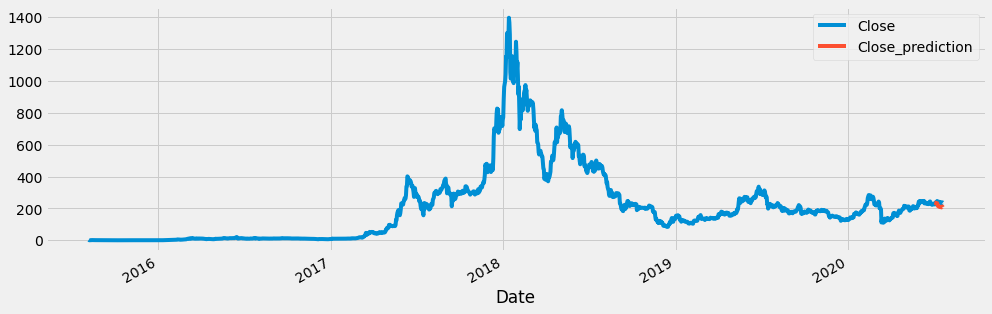

In [56]:
_ = data_all[['Close','Close_prediction']].plot(figsize=(15, 5))

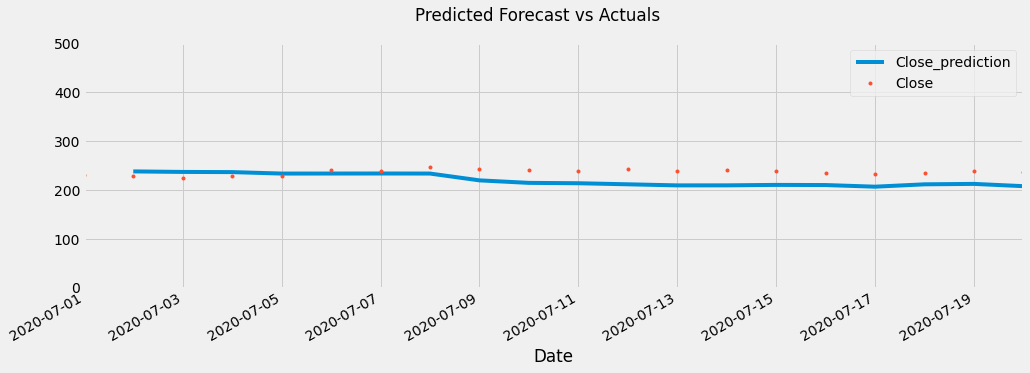

In [58]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Close_prediction','Close']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2020-07-01', upper='2020-07-20')
ax.set_ylim(0, 500)
plot = plt.suptitle('Predicted Forecast vs Actuals')

In [60]:
mse(y_true=data_test['Close'],
                   y_pred=data_test['Close_prediction'])

493.66923161389747

In [61]:
mae(y_true=data_test['Close'],
                   y_pred=data_test['Close_prediction'])

20.191743228310035

### This model seems to have a better performance but just for the close prediction of 20 days

## Prophet model

In [108]:
from fbprophet import Prophet

In [109]:
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d')
data  = pd.read_csv('full_data_eth_20072020.csv', parse_dates=[0], date_parser=dateparse)
columns = ['Open','High','Low','Close','Volume','Market Cap']
num_data = obj_to_num(data,columns)
data['Date'] = data['Date'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
data = data.set_index('Date')
data = data[['Close']]
#data.dropna(subset=['Close'], inplace=True)
data[-5:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,Close
Date,
2020-07-16,233.64
2020-07-17,232.77
2020-07-18,235.48
2020-07-19,238.49
2020-07-20,236.15


In [110]:
split_date = '2020-07-01'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [111]:
data_train = data_train.reset_index().rename(columns={'Date':'ds', 'Close':'y'})

In [112]:
model = Prophet()
model.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [113]:
data_test_fcst = model.predict(df=data_test.reset_index().rename(columns={'Date':'ds'}))

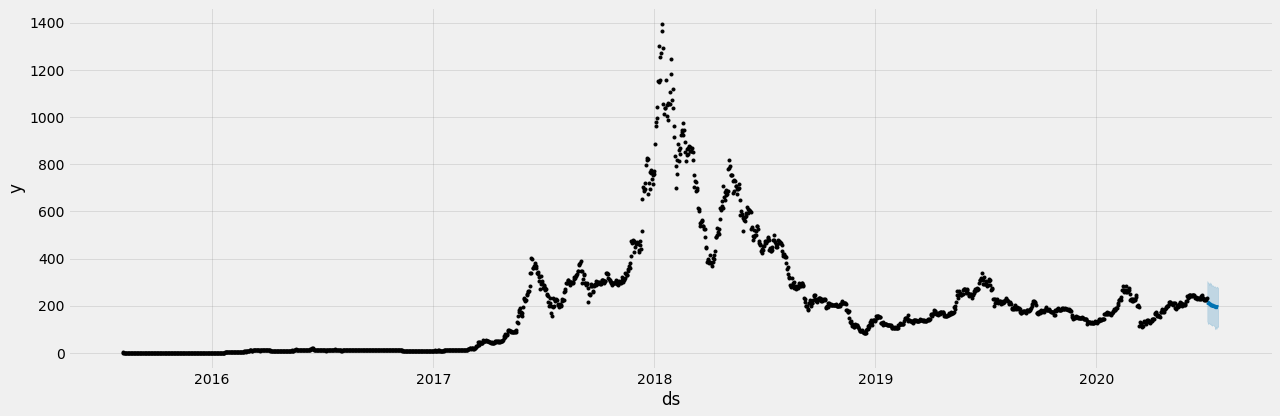

In [114]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(18)
fig = model.plot(data_test_fcst, ax=ax)

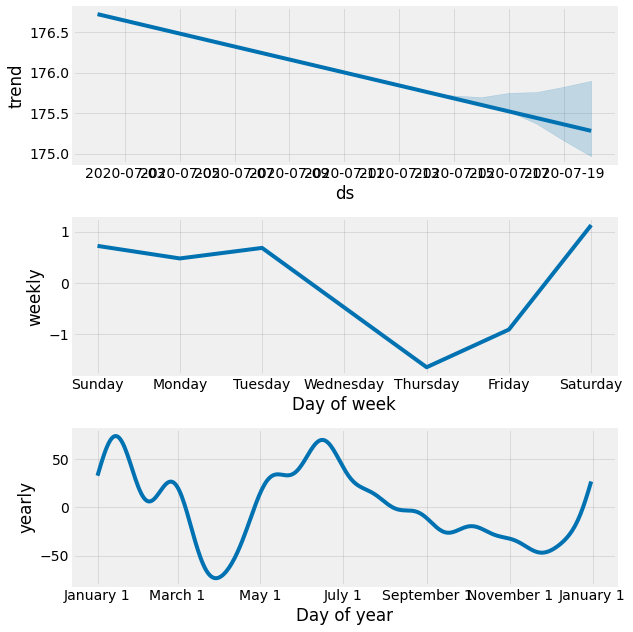

In [115]:
fig = model.plot_components(data_test_fcst)

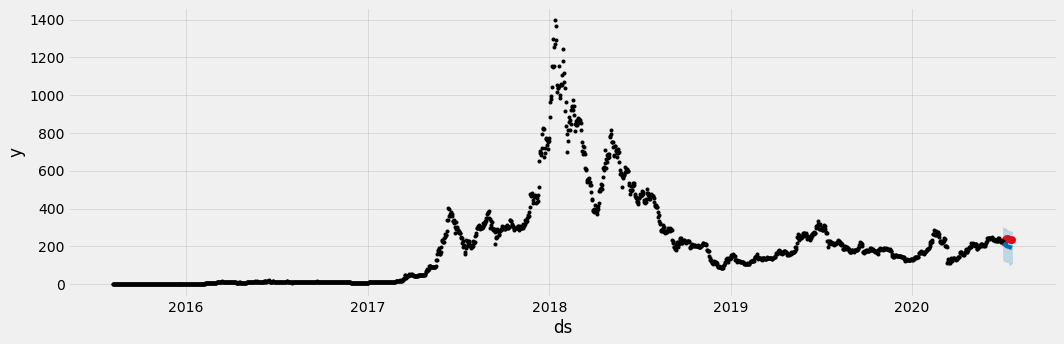

In [117]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['Close'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

In [118]:
data_fcst = data_test_fcst
data_fcst = data_fcst.rename(columns={'ds': 'Date'})
data_all = pd.concat([data_fcst, data_train], sort=False)
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'yhat': 'prophet'})
final_data = final_data[['Date','Close','lstm','xgboost','prophet']]

ConversionError: ignored

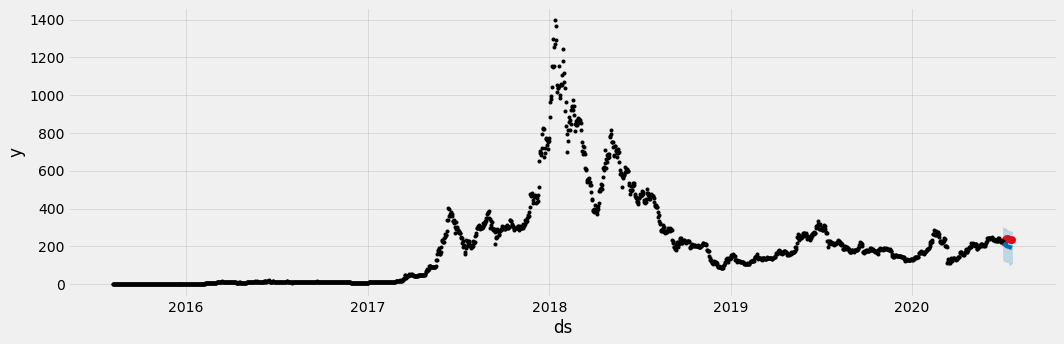

In [119]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['Close'], color='r')
fig = model.plot(data_test_fcst, ax=ax)
ax.set_xbound(lower='2020-07-02', upper='2020-07-20')
ax.set_ylim(0, 500)
plot = plt.suptitle('Predicted Forecast vs Actuals')

In [121]:
mse(y_true=data_test['Close'],
                   y_pred=data_test_fcst['yhat'])

1361.8254247225857

In [122]:
mae(y_true=data_test['Close'],
                   y_pred=data_test_fcst['yhat'])

35.35000482542635

In [124]:
trace0 = go.Scatter(
    x = final_data['Date'],
    y = final_data['Close'],
    mode = 'lines+markers',
    name = 'Real Price'
)
trace1 = go.Scatter(
    x = final_data['Date'],
    y = final_data['lstm'],
    mode = 'lines+markers',
    name = 'LSTM Prediction'
)
trace2 = go.Scatter(
    x = final_data['Date'],
    y = final_data['xgboost'],
    mode = 'lines+markers',
    name = 'XGBoost Prediction'
)
trace3 = go.Scatter(
    x = final_data['Date'],
    y = final_data['prophet'],
    mode = 'lines+markers',
    name = 'Prophet Prediction'
)

# Edit the layout
layout = dict(title = 'Comparision of LSTM,XGBoost and Prophet',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Prices (USD)'),
              )

data = [trace0, trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

In [ ]:
# kata 
def rthn_between(a, b):
    lst = []

    if a == 0:
        a = 10

    for x in range(a,b+1):
      l = 1
      v = True
      while v:
        new_num = str(x)[:l] 
        s = sum([int(digit) for digit in new_num])
        if int(new_num)%s != 0:
          v = False
        elif int(new_num)%s == 0 and len(new_num) == len(str(x)):
          lst.append(x)
          v = False
        else:
          l += 1
    return lst


In [ ]:
# rthn_between(0, 999999)  #[9000004000000, 9000004000008]

In [ ]:
0**1

0